# Parcial I - M√©todos Computacionales

**2025-1**

---

Nombre:

Identificaci√≥n:

---

* ‚ö† Explique su c√≥digo usando con comentarios,

* ‚ùóTodas las funciones deben tener documentaci√≥n b√°sica,

* üõë El uso de IA's no est√° permitido,

* ‚öõ La interpretaci√≥n del enunciado hace parte de la evaluaci√≥n,

* ‚è≤ Este parcial tiene una duraci√≥n de 2 horas

In [6]:
# Librerias √∫tiles
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **m√©todo de Ridder** es un algoritmo de b√∫squeda de ra√≠ces que, como la bisecci√≥n, requiere un intervalo $[a, b]$ tal que $f(a) \cdot f(b) < 0$. A diferencia de la bisecci√≥n, Ridder introduce una correcci√≥n exponencial para acelerar la convergencia, logrando **convergencia cuadr√°tica** sin requerir derivadas.

---
### Pasos para implementar

1. **Definir la funci√≥n** $f(x)$ y un intervalo $[a, b]$ tal que:

   - $f(a) \cdot f(b) < 0$ (la funci√≥n tiene signos opuestos en los extremos del intervalo).
   - La funci√≥n debe ser continua en $[a, b]$.

2. **Calcular el punto medio**:

   $$
   m = \frac{a + b}{2}
   $$

3. **Calcular la correcci√≥n exponencial**:

   - Evaluar $f(a)$, $f(b)$ y $f(m)$.
   - Calcular:

     $$
     s = \sqrt{f(m)^2 - f(a) f(b)}
     $$

   - Si $s = 0$, detener: la ra√≠z no puede estimarse en esta iteraci√≥n.

   - Calcular el nuevo candidato a ra√≠z:

     $$
     x = m + \frac{(m - a) f(m)}{s} \cdot \text{sign}(f(a) - f(b))
     $$

4. **Evaluar $f(x)$** y actualizar el intervalo:

   - Si $f(m) \cdot f(x) < 0$, entonces la nueva ra√≠z est√° entre $m$ y $x$.
   - Si $f(a) \cdot f(x) < 0$, entonces actualizar $b = x$, luego $f(b) = f(x)$.
   - Si $f(b) \cdot f(x) < 0$, entonces actualizar $a = x$, luego $f(a) = f(x)$.
   - En cada paso mantener la condici√≥n $f(a) \cdot f(b) < 0$.

5. **Criterio de parada**:

   - Repetir los pasos anteriores hasta que se alcance la tolerancia deseada:

     $$
     |f(x)| < \varepsilon \quad \text{o} \quad |b - a| < \delta
     $$

   donde $\varepsilon$ y $\delta$ son tolerancias establecidas por el usuario.

---

* Defina una funci√≥n llamada `Ridder` que calcule la raiz de una funci√≥n dada. Su funci√≥n debe tener documentaci√≥n y retornar el valor de la raiz junto con el n√∫mero de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x,$$

Grafique la funci√≥n para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame con los datos de $x$ y $f(x)$, y encuentre una primera aproximaci√≥n a la raiz aplicando un filtro en el dataframe con los valores m√°s cercanos a cero.

* Usando el m√©todo de Ridder encuentre la raiz n√∫mericamente y compare su resultado usando el m√©todo de bisecci√≥n y secante.

* Para las siguientes tolerancias (ver c√≥digo) realice un gr√°fico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¬øQu√© puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -20, 20)

# Grafico semilog

plt.semilogy(N, tol)

```

In [132]:
from re import X
# Aqu√≠ va su c√≥digo
def rider(f,A,B,tol=1e-15,iter=1000):
  iteraciones = iter
  count = 0
  a=A
  b=B
  while count < iteraciones:
    m=(a+b)/2
    fa=f(a)
    fb=f(b)
    fm=f(m)
    if fa*fb > 0:
      print("elegir un intervalo con una raiz dentro")
      break
    s= math.sqrt((fm**2)-fa*fb)
    if s==0:
      break
    else:
      signo = np.sign(fa-fb)
      x1 = m + ((m-a)*fm)*signo/s
    fx1=f(x1)
    if fm*fx1<0:
      a=m
      b=x1
    elif fa*fx1<0:
      b=x1
      fb=fx1
    elif fb*fx1<0:
      a=x1
      fa=fx1
    if abs(fa) < tol:
      break
    count+=1
  return a,count


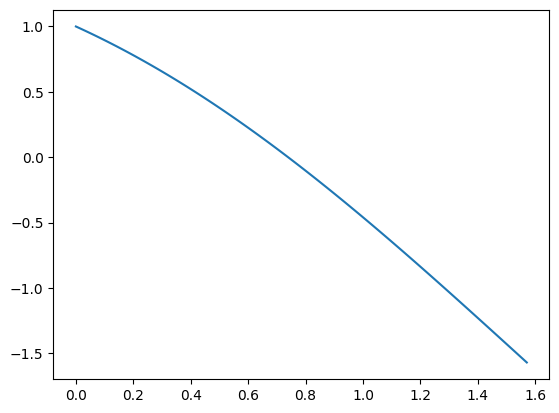

In [133]:
cos = lambda x: math.cos(x) - x
rider(cos,0,(3*(math.pi))/2)
x=np.linspace(0,math.pi/2,100)
plt.plot(x, [cos(i) for i in x])

SyntaxError: invalid syntax (<ipython-input-115-27514368ec74>, line 1)

#2

**(60 puntos)** En √≥ptica, cuando un rayo de luz atraviesa la interfaz entre dos medios con diferentes √≠ndices de refracci√≥n, su direcci√≥n cambia seg√∫n la ley de Snell. Para el caso de un prisma triangular, cuando un rayo emerge despu√©s de dos refracciones, el √°ngulo de desviaci√≥n total $\delta$ est√° dado por:

$$\delta(\theta_i) = \theta_i + \arcsin\left(n\sin\left(A - \arcsin\left(\frac{\sin\theta_i}{n}\right)\right)\right) - A$$

donde $\theta_i$ es el √°ngulo de incidencia, $n$ es el √≠ndice de refracci√≥n del prisma y $A$ es el √°ngulo del prisma.

La derivada de esta funci√≥n con respecto al √°ngulo de incidencia $\theta_i$ es:

$$\frac{d\delta}{d\theta_i} = 1 - \frac{\cos\theta_i \cdot \cos(A-\theta_r)}{\cos\theta_r \cdot \sqrt{1-n^2\sin^2(A-\theta_r)}}$$

donde $\theta_r = \arcsin\left(\frac{\sin\theta_i}{n}\right)$ es el √°ngulo de refracci√≥n en la primera interfaz.

Considere un prisma de vidrio crown con $n = 1.52$ y $A = 60¬∞$.

### Parte A:
* Escriba una funci√≥n explicita y documentada para $\frac{d\delta}{d\theta_i}$

* Realice un gr√°fico para $\frac{d\delta}{d\theta_i}$ y encuentre el √°ngulo de incidencia $\theta_i$ que produce el √°ngulo de desviaci√≥n m√≠nimo para $\theta_i \in [30¬∞, 80¬∞]$.

* Use el m√©todo de Newton-Raphson (sin derivada) y el m√©todo de la secante para hallar el √°ngulo de desviaci√≥n m√≠nimo.


### Parte B:
* Determine el √°ngulo cr√≠tico $\theta_c$ para el cual el rayo comienza a experimentar reflexi√≥n interna total en la segunda interfaz del prisma. Esta condici√≥n ocurre cuando:

$$\sin(A - \theta_r) = \frac{1}{n}$$

* Resuelva num√©ricamente la ecuaci√≥n anterior para encontrar el √°ngulo de incidencia $\theta_i$ correspondiente a este √°ngulo cr√≠tico, utilizando el m√©todo de la bisecci√≥n.





In [ ]:
# Aqu√≠ va su c√≥digo